In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt
import copy

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(classDict)
print(y_classes)

(4500, 400) (500, 400)
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()
y_train_onehot = label_binarize(y_train,y_classes).transpose()

X_test_scaled = scaler.transform(X_test).transpose()
y_test_onehot = label_binarize(y_test,y_classes).transpose()

In [6]:
print(scaler.mean_[25])
print(np.mean(X_train,axis=0)[25])

0.000217274267731782
0.000217274267731782


In [9]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[25,25,25], alpha =.05, miniBatchSize = 128, p_keep = 1.0, regular = {"lambd":0.0, "N":2}, gradClip = 2.0, gradNorm = 1.0)

In [10]:
neuralNetMutExc.fit(100,X_test_scaled,y_test_onehot)

array([  2.37035442,   2.31813224,   2.3130138 ,   2.31701375,
         2.32494441,   2.33583129,   2.35035854,   2.36861244,
         2.39420636,   2.43028161,   2.48201068,   2.56050056,
         2.66236425,   2.79621288,   3.02369272,   3.3634258 ,
         4.21142347,   5.30785844,   6.68402991,   7.86211987,
         9.39695538,   9.84531167,  10.54878033,  11.14502554,
        12.31350302,  13.62627804,  14.78352119,  16.04177555,
        17.55080563,  18.99283943,  20.13335022,  21.40847954,
        22.66467167,  23.94471606,  25.29479075,  26.76439687,
        27.71547081,  29.29643941,  30.77437647,  31.53579706,
        33.09648377,  34.6974786 ,  35.63183708,  37.79374663,
        39.14538568,  39.06167926,  41.39647999,  42.21538364,
        43.89943414,  45.04088896,  46.21192463,  47.63422959,
        49.38774857,  50.74106219,  51.72465643,  53.15445954,
        53.55558778,  55.13521868,  56.88072508,  59.23069518,
        60.65909164,  59.82038739,  61.98734416,  63.58

2.312961132365328


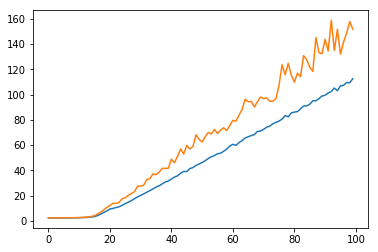

In [11]:
print(neuralNetMutExc.test_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [12]:
#update hyperparameters
hyperDict = {"alpha":.001,"regular":{"N":2,"lambd":1}}
neuralNetMutExc.updateHyperparam(**hyperDict)

In [11]:
neuralNetMutExc.updateHyperparam(fakeParam = 2,fakeParam2 = 5)

The following are not valid hyperparameter names
 ['fakeParam', 'fakeParam2']
These are the hyperparameters and their values:
gradNorm :  1.0
regular :  {'N': 2, 'lambd': 1}
p_keep :  1.0
gradClip :  2.0
alpha :  0.001


In [13]:
neuralNetMutExc.fit(50,X_test_scaled,y_test_onehot)

array([113.65987457, 103.11233776,  94.43724739,  87.33292437,
        82.19413558,  77.91261054,  74.20048799,  70.98570085,
        68.32676532,  65.78450471,  63.5103308 ,  61.36194566,
        59.29499181,  57.3988037 ,  55.55883282,  53.82070572,
        52.26061974,  50.72114075,  49.28397448,  47.89805434,
        46.61112394,  45.41573135,  44.27266717,  43.19978062,
        42.15831204,  41.18705151,  40.27503629,  39.37458234,
        38.559747  ,  37.7525967 ,  37.01208255,  36.29535791,
        35.61625118,  34.95813087,  34.35966665,  33.75892991,
        33.22229343,  32.67563091,  32.17726105,  31.69550219,
        31.25271085,  30.78631936,  30.3780601 ,  29.97128577,
        29.58779188,  29.22284878,  28.88500808,  28.55399624,
        28.24710029,  27.9397152 ])

2.3703544198009787


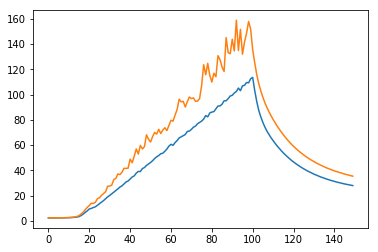

In [14]:
print(neuralNetMutExc.train_loss_vec[0])
plt.plot(neuralNetMutExc.train_loss_vec)
plt.plot(neuralNetMutExc.test_loss_vec)
plt.show()

In [15]:
YHat, loss = neuralNetMutExc.predict(X_test_scaled,y_test_onehot)
print(YHat.shape)
max_ind = np.argmax(YHat,axis = 0)
max_prob = np.amax(YHat,axis = 0)
max_prob_class = [neuralNetMutExc.outputL.classVec[x] for x in max_ind]

print(len(max_prob_class))
print(len(y_test))

(10, 500)
500
500


In [16]:
print(YHat[:,:15])
print(max_prob_class)
print(y_test.transpose())
unique, counts = np.unique(y_test, return_counts = True)
dict(zip(unique,counts))

[[8.44589248e-002 8.44583090e-002 8.45171488e-002 8.44845722e-002
  8.45007771e-002 8.44794564e-002 8.44659637e-002 8.44790955e-002
  8.44842222e-002 8.45530085e-002 8.44915361e-002 8.44926320e-002
  8.44824719e-002 8.45454308e-002 8.45247438e-002]
 [1.23462321e-001 1.23460847e-001 1.23601759e-001 1.23523726e-001
  1.23562537e-001 1.23511476e-001 1.23479171e-001 1.23510611e-001
  1.23522888e-001 1.23687705e-001 1.23540403e-001 1.23543028e-001
  1.23518696e-001 1.23669539e-001 1.23619957e-001]
 [9.59784350e-117 9.44368590e-117 4.43892183e-116 1.88404676e-116
  2.88545241e-116 1.64686304e-116 1.15493229e-116 1.63130624e-116
  1.86678419e-116 1.14061453e-115 2.26278046e-116 2.32895553e-116
  1.78279453e-116 9.34358615e-116 5.42088236e-116]
 [1.24046507e-001 1.24048501e-001 1.23857967e-001 1.23963451e-001
  1.23910978e-001 1.23980017e-001 1.24023711e-001 1.23981186e-001
  1.23964585e-001 1.23741866e-001 1.23940901e-001 1.23937352e-001
  1.23970252e-001 1.23766399e-001 1.23833376e-001]
 [1.

{1: 61, 2: 41, 3: 63, 4: 49, 5: 48, 6: 35, 7: 56, 8: 54, 9: 40, 10: 53}

In [18]:
neuralNetMutExc.layers[0].A_prev[:,0]

array([ 0.00000000e+00,  0.00000000e+00, -1.49087765e-02,  1.84438416e-02,
        1.34911623e-02, -1.69129774e-02, -1.93402152e-02, -1.60809251e-02,
       -5.29353280e-03, -1.25856353e-02, -1.31216343e-02,  2.68439964e-02,
        2.87328638e-02,  4.40911974e-02,  4.13893538e-02,  3.62844517e-02,
        2.23725310e-02,  9.81834848e-03, -1.80433506e-02,  0.00000000e+00,
       -1.49087765e-02,  1.04054478e-02,  1.29588909e-02,  4.55492499e-03,
        1.02139917e-02, -1.60928380e-02, -3.21558410e-02, -3.90451554e-02,
       -3.37257176e-02, -1.81611897e-02,  7.75689876e-03,  4.31891470e-02,
        2.12543850e-02,  1.93052676e-02,  8.57517813e-03,  1.32403333e-02,
        1.47529975e-02,  4.30164181e-02,  2.42647773e-02,  2.00646038e-02,
        1.41410525e-02, -1.20066022e-02,  2.11088340e-02, -1.82821736e-02,
       -4.37689270e-02, -6.95300796e-02, -8.97595944e-02, -8.90567823e-02,
       -7.62163874e-02, -4.76562993e-02, -2.84114398e-02, -3.60148977e-02,
       -6.99232234e-02, -

In [28]:
print(neuralNetMutExc.layers[0].A_prev.shape)
print(neuralNetMutExc.layers[1].A_prev[:,:3])
print(neuralNetMutExc.outputL.A_prev[:,:3])

(400, 500)
[[  0.           0.           0.        ]
 [106.07598252 106.06408952 106.06428884]
 [ 26.41202282  26.40906157  26.4091112 ]
 [ 28.89018345  28.88694434  28.88699863]
 [ 19.28156255  19.27940074  19.27943697]
 [  0.           0.           0.        ]
 [117.20628175 117.19314085 117.19336108]
 [  0.           0.           0.        ]
 [ 25.9423688   25.9394602   25.93950895]
 [ 64.61760952  64.61036474  64.61048616]
 [105.59460011 105.58276108 105.5829595 ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  6.4992222    6.49849352   6.49850574]
 [ 70.95594413  70.94798871  70.94812204]
 [ 18.65318845  18.6510971   18.65113215]
 [ 62.34654075  62.3395506   62.33966775]
 [ 90.02595688  90.01586338  90.01603254]
 [147.68659292 147.67003464 147.67031215]
 [116.76051119 116.74742026 116.74763966]
 [128.10627367 128.09191069 128.09215141]
 [ 47.0902291   47.08494945  47.08503793]
 [  0.           0.           0.        ]
 [  9.49483557   9.4937